<p align="center"><img src="https://i.imgur.com/pSDefTx.jpg"></p>

## Data Extraction

In [1]:
import requests
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

# request package to GET from API endpoint
r = requests.get(url)

# transform request into json object
json = r.json()

json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [2]:
teams_df = pd.DataFrame(json['teams'])
elements_df = pd.DataFrame(json['elements'])
element_types_df = pd.DataFrame(json['element_types'])

## Data Exploration

In [3]:
pd.set_option('display.max_columns', None)
elements_df

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,75.0,NaN,80201,0,0,-4,4,0,1,0.4,0.5,0,Bernd,0.0,1,False,Groin Injury - 75% chance of playing,2021-12-06T23:00:13.342729Z,46,80201.jpg,1.3,Leno,0.9,False,None,d,1,3,4,60456,266,176329,1216,0.0,0.9,Leno,270,0,0,0,9,0,0,0,0,0,9,0,48,79.0,0.0,0.0,7.9,296,25,587,61,571,55,366,25,NaN,,NaN,,NaN,
1,0.0,0.0,115918,0,0,0,0,0,1,0.0,0.0,0,Rúnar Alex,0.0,2,False,Joined OH Leuven on a season-long loan - Expec...,2021-08-31T22:00:09.069158Z,40,115918.jpg,0.0,Rúnarsson,0.7,False,None,u,1,3,0,19017,0,66454,481,0.0,0.0,Rúnarsson,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,462,42,450,23,412,14,467,42,NaN,,NaN,,NaN,
2,0.0,0.0,47431,0,0,-2,2,0,3,0.0,0.0,0,Willian,0.0,3,False,Transferred to Corinthians,2021-08-20T09:30:14.065783Z,63,47431.jpg,0.0,Borges Da Silva,0.1,False,None,u,1,3,0,914,0,20257,16,0.0,0.0,Willian,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,635,260,634,260,634,260,635,260,NaN,,NaN,,NaN,
3,100.0,100.0,54694,0,0,-3,3,0,4,2.0,2.0,1,Pierre-Emerick,1.5,4,False,,2021-11-19T16:30:08.907928Z,97,54694.jpg,3.1,Aubameyang,2.8,False,None,a,1,3,44,715893,6918,736791,20356,0.2,4.5,Aubameyang,1036,4,1,6,16,0,0,2,3,0,0,7,131,217.6,132.4,582.0,92.9,115,14,128,21,6,3,27,10,NaN,,NaN,,1.0,
4,NaN,NaN,58822,0,0,-3,3,0,2,0.5,0.5,0,Cédric,0.0,5,False,,None,42,58822.jpg,0.3,Soares,0.2,False,None,a,1,3,1,11758,159,22948,200,0.0,0.2,Cédric,188,0,0,0,7,0,0,0,1,0,0,0,21,30.8,36.1,1.0,6.8,362,137,279,87,389,145,374,134,NaN,,NaN,,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.0,0.0,481626,0,0,0,0,0,2,0.0,0.0,0,Christian,0.0,549,False,Season-long loan to Belenenses,2021-09-07T09:00:15.908306Z,40,481626.jpg,0.0,Marques,0.2,False,None,u,20,39,0,24271,0,26813,171,0.0,0.0,Marques,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,495,186,483,187,445,174,500,187,NaN,,NaN,,NaN,
636,NaN,NaN,184754,-1,1,1,-1,1,4,0.8,0.8,2,Hee-Chan,1.8,583,False,,None,56,184754.jpg,3.8,Hwang,8.6,False,None,a,20,39,45,1531037,8871,843666,80874,0.3,8.0,Hwang,943,4,0,5,7,0,0,0,1,0,0,8,171,198.2,126.7,237.0,55.7,132,17,134,23,65,26,89,23,NaN,,NaN,,NaN,
637,NaN,NaN,242510,0,0,0,0,0,1,-1.0,-1.0,0,Louie,0.0,611,False,,None,40,242510.jpg,0.0,Moulden,0.2,False,None,a,20,39,0,15973,271,8106,409,0.0,0.0,Moulden,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,476,49,464,30,426,21,481,49,NaN,,NaN,,NaN,
638,NaN,NaN,518504,0,0,0,0,0,1,-1.0,-1.0,0,James,0.0,621,False,,None,40,518504.jpg,0.0,Storer,0.1,False,None,a,20,39,0,6710,827,2093,465,0.0,0.0,Storer,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,502,56,490,37,453,28,507,56,NaN,,NaN,,NaN,


In [4]:
# drop players that are unavailable
elements_df.drop(elements_df[elements_df.status=='u'].index, inplace=True)
elements_df.reset_index(inplace=True)

In [5]:
elements_df.columns

Index(['index', 'chance_of_playing_next_round', 'chance_of_playing_this_round',
       'code', 'cost_change_event', 'cost_change_event_fall',
       'cost_change_start', 'cost_change_start_fall', 'dreamteam_count',
       'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name',
       'form', 'id', 'in_dreamteam', 'news', 'news_added', 'now_cost', 'photo',
       'points_per_game', 'second_name', 'selected_by_percent', 'special',
       'squad_number', 'status', 'team', 'team_code', 'total_points',
       'transfers_in', 'transfers_in_event', 'transfers_out',
       'transfers_out_event', 'value_form', 'value_season', 'web_name',
       'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'influence_rank', 'influence_rank_type',
       'creativity_rank', 'creativity_rank_type', 'thr

In [6]:
# identify players who are in the dreamteam
dreamteam_df = elements_df[['dreamteam_count', 'element_type', 'in_dreamteam', 'now_cost', 'points_per_game', 'selected_by_percent', 'total_points', 'value_form', 'value_season', 'web_name']]
dreamteam_df = dreamteam_df[dreamteam_df['in_dreamteam']==True].sort_values(by=['element_type','points_per_game'], ascending=[True,True])
dreamteam_df

,dreamteam_count,element_type,in_dreamteam,now_cost,points_per_game,selected_by_percent,total_points,value_form,value_season,web_name
555,3,1,True,50,4.5,3.2,67,1.4,13.4,Sá
294,2,2,True,66,5.2,18.0,78,1.1,11.8,van Dijk
325,4,2,True,68,5.6,39.0,84,0.6,12.4,Cancelo
160,4,2,True,62,6.9,35.0,76,0.5,12.3,James
302,4,2,True,81,7.6,40.1,99,1.1,12.2,Alexander-Arnold
298,6,3,True,131,10.1,73.1,152,0.7,11.6,Salah
295,1,3,True,119,5.3,4.1,79,0.4,6.6,Mané
305,1,3,True,80,5.6,29.6,79,1.0,9.9,Jota
330,3,3,True,76,6.0,22.8,84,1.2,11.1,Bernardo
455,3,3,True,104,6.2,20.9,81,0.7,7.8,Son


In [7]:
# cost of the current dreamteam
dreamteam_df.now_cost.sum()

944

In [8]:
main_df = elements_df[['element_type','now_cost','points_per_game','selected_by_percent','team','total_points',
                       'value_form','value_season','web_name','minutes','goals_scored','assists','clean_sheets',
                       'goals_conceded','own_goals','penalties_saved','penalties_missed','yellow_cards','red_cards',
                       'saves','bonus','bps','influence','creativity','threat','ict_index']]

In [9]:
element_types_df

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],73
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],217
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],263
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],87


In [10]:
teams_df

,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,4,None,False,0,1190,1250,1110,1140,1110,1170,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,3,None,False,0,1130,1160,1110,1120,1130,1160,2
2,94,0,None,3,0,Brentford,0,0,0,BRE,3,None,False,0,1070,1080,1130,1160,1100,1150,130
3,36,0,None,4,0,Brighton,0,0,0,BHA,3,None,False,0,1140,1140,1160,1190,1090,1130,131
4,90,0,None,5,0,Burnley,0,0,0,BUR,2,None,False,0,1040,1050,1040,1070,1060,1100,43
5,8,0,None,6,0,Chelsea,0,0,0,CHE,5,None,False,0,1340,1350,1330,1350,1340,1330,4
6,31,0,None,7,0,Crystal Palace,0,0,0,CRY,3,None,False,0,1080,1110,1110,1160,1110,1140,6
7,11,0,None,8,0,Everton,0,0,0,EVE,3,None,False,0,1140,1190,1120,1140,1150,1210,7
8,13,0,None,9,0,Leicester,0,0,0,LEI,3,None,False,0,1170,1190,1100,1130,1120,1160,26
9,2,0,None,10,0,Leeds,0,0,0,LEE,3,None,False,0,1080,1100,1060,1070,1100,1130,9


## Data Preparation

In [11]:
# populate player positions onto the main dataframe
main_df = pd.merge(left=main_df,right=element_types_df[['id','singular_name']],left_on='element_type', right_on='id', how='left')

In [12]:
# populate club names onto the main dataframe
main_df = pd.merge(left=main_df,right=teams_df[['id','name']],left_on='team',right_on='id',how='left')

In [13]:
main_df

,element_type,now_cost,points_per_game,selected_by_percent,team,total_points,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,id_x,singular_name,id_y,name
0,1,46,1.3,0.9,1,4,0.0,0.9,Leno,270,0,0,0,9,0,0,0,0,0,9,0,48,79.0,0.0,0.0,7.9,1,Goalkeeper,1,Arsenal
1,4,97,3.1,2.8,1,44,0.2,4.5,Aubameyang,1036,4,1,6,16,0,0,2,3,0,0,7,131,217.6,132.4,582.0,92.9,4,Forward,1,Arsenal
2,2,42,0.3,0.2,1,1,0.0,0.2,Cédric,188,0,0,0,7,0,0,0,1,0,0,0,21,30.8,36.1,1.0,6.8,2,Defender,1,Arsenal
3,4,83,1.8,1.1,1,18,0.2,2.2,Lacazette,439,1,0,2,5,0,0,0,0,0,0,0,56,70.0,98.9,121.0,28.9,4,Forward,1,Arsenal
4,3,48,1.0,0.3,1,5,0.0,1.0,Xhaka,385,0,0,0,12,0,0,0,1,1,0,0,42,53.2,56.2,11.0,12.0,3,Midfielder,1,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,3,45,0.0,0.3,20,0,0.0,0.0,Campbell,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,3,Midfielder,20,Wolves
558,4,56,3.8,8.6,20,45,0.3,8.0,Hwang,943,4,0,5,7,0,0,0,1,0,0,8,171,198.2,126.7,237.0,55.7,4,Forward,20,Wolves
559,1,40,0.0,0.2,20,0,0.0,0.0,Moulden,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,Goalkeeper,20,Wolves
560,1,40,0.0,0.1,20,0,0.0,0.0,Storer,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,Goalkeeper,20,Wolves


In [14]:
# drop irrelevant columns
main_df = main_df.drop(['element_type','team','id_x','id_y'],axis=1)

In [15]:
# rename column names
main_df = main_df.rename(columns = {'singular_name': 'position', 'name': 'club'})

In [16]:
# rearrange columns sequence
main_df = main_df[['web_name','position','club','selected_by_percent',
                   'now_cost','total_points','points_per_game',
                   'minutes','goals_scored','assists','clean_sheets',
                   'goals_conceded','own_goals','penalties_saved',
                   'penalties_missed','yellow_cards','red_cards',
                   'saves','bonus','bps','influence','creativity',
                   'threat','ict_index','value_form','value_season']]
main_df

,web_name,position,club,selected_by_percent,now_cost,total_points,points_per_game,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value_form,value_season
0,Leno,Goalkeeper,Arsenal,0.9,46,4,1.3,270,0,0,0,9,0,0,0,0,0,9,0,48,79.0,0.0,0.0,7.9,0.0,0.9
1,Aubameyang,Forward,Arsenal,2.8,97,44,3.1,1036,4,1,6,16,0,0,2,3,0,0,7,131,217.6,132.4,582.0,92.9,0.2,4.5
2,Cédric,Defender,Arsenal,0.2,42,1,0.3,188,0,0,0,7,0,0,0,1,0,0,0,21,30.8,36.1,1.0,6.8,0.0,0.2
3,Lacazette,Forward,Arsenal,1.1,83,18,1.8,439,1,0,2,5,0,0,0,0,0,0,0,56,70.0,98.9,121.0,28.9,0.2,2.2
4,Xhaka,Midfielder,Arsenal,0.3,48,5,1.0,385,0,0,0,12,0,0,0,1,1,0,0,42,53.2,56.2,11.0,12.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,Campbell,Midfielder,Wolves,0.3,45,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
558,Hwang,Forward,Wolves,8.6,56,45,3.8,943,4,0,5,7,0,0,0,1,0,0,8,171,198.2,126.7,237.0,55.7,0.3,8.0
559,Moulden,Goalkeeper,Wolves,0.2,40,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
560,Storer,Goalkeeper,Wolves,0.1,40,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
main_df.dtypes

web_name               object
position               object
club                   object
selected_by_percent    object
now_cost                int64
total_points            int64
points_per_game        object
minutes                 int64
goals_scored            int64
assists                 int64
clean_sheets            int64
goals_conceded          int64
own_goals               int64
penalties_saved         int64
penalties_missed        int64
yellow_cards            int64
red_cards               int64
saves                   int64
bonus                   int64
bps                     int64
influence              object
creativity             object
threat                 object
ict_index              object
value_form             object
value_season           object
dtype: object

In [18]:
# convert data types of columns
main_df['selected_by_percent'] = main_df.selected_by_percent.astype(float)
main_df['now_cost'] = main_df['now_cost']/10
main_df['points_per_game'] = main_df.points_per_game.astype(float)
main_df['influence'] = main_df.influence.astype(float)
main_df['creativity'] = main_df.creativity.astype(float)
main_df['threat'] = main_df.threat.astype(float)
main_df['ict_index'] = main_df.ict_index.astype(float)
main_df['value_form'] = main_df.value_form.astype(float)
main_df['value_season'] = main_df.value_season.astype(float)

In [19]:
# add column of sum(value_form + value_season)
main_df['value_form_season'] = main_df['value_form'] + main_df['value_season']
main_df

,web_name,position,club,selected_by_percent,now_cost,total_points,points_per_game,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value_form,value_season,value_form_season
0,Leno,Goalkeeper,Arsenal,0.9,4.6,4,1.3,270,0,0,0,9,0,0,0,0,0,9,0,48,79.0,0.0,0.0,7.9,0.0,0.9,0.9
1,Aubameyang,Forward,Arsenal,2.8,9.7,44,3.1,1036,4,1,6,16,0,0,2,3,0,0,7,131,217.6,132.4,582.0,92.9,0.2,4.5,4.7
2,Cédric,Defender,Arsenal,0.2,4.2,1,0.3,188,0,0,0,7,0,0,0,1,0,0,0,21,30.8,36.1,1.0,6.8,0.0,0.2,0.2
3,Lacazette,Forward,Arsenal,1.1,8.3,18,1.8,439,1,0,2,5,0,0,0,0,0,0,0,56,70.0,98.9,121.0,28.9,0.2,2.2,2.4
4,Xhaka,Midfielder,Arsenal,0.3,4.8,5,1.0,385,0,0,0,12,0,0,0,1,1,0,0,42,53.2,56.2,11.0,12.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,Campbell,Midfielder,Wolves,0.3,4.5,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
558,Hwang,Forward,Wolves,8.6,5.6,45,3.8,943,4,0,5,7,0,0,0,1,0,0,8,171,198.2,126.7,237.0,55.7,0.3,8.0,8.3
559,Moulden,Goalkeeper,Wolves,0.2,4.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560,Storer,Goalkeeper,Wolves,0.1,4.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Remarks:
- _**influence**_ evaluates a player’s impact on a match, taking into account actions that could directly or indirectly affect the match outcome
- _**creativity**_ assesses player performance in terms of producing goalscoring opportunities for other players
- _**threat**_ gauges players who are most likely to score goals
- _**ict_index**_ developed specifically to assess a player as an FPL asset, combining Influence, Creativity and Threat scores
- _**value_form**_ = Player’s form divided by player’s value
- _**value_season**_ = Player’s total points divided by player’s value

In [20]:
# filter players with stats
main_df = main_df[main_df['value_form_season']>0]
main_df

,web_name,position,club,selected_by_percent,now_cost,total_points,points_per_game,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value_form,value_season,value_form_season
0,Leno,Goalkeeper,Arsenal,0.9,4.6,4,1.3,270,0,0,0,9,0,0,0,0,0,9,0,48,79.0,0.0,0.0,7.9,0.0,0.9,0.9
1,Aubameyang,Forward,Arsenal,2.8,9.7,44,3.1,1036,4,1,6,16,0,0,2,3,0,0,7,131,217.6,132.4,582.0,92.9,0.2,4.5,4.7
2,Cédric,Defender,Arsenal,0.2,4.2,1,0.3,188,0,0,0,7,0,0,0,1,0,0,0,21,30.8,36.1,1.0,6.8,0.0,0.2,0.2
3,Lacazette,Forward,Arsenal,1.1,8.3,18,1.8,439,1,0,2,5,0,0,0,0,0,0,0,56,70.0,98.9,121.0,28.9,0.2,2.2,2.4
4,Xhaka,Midfielder,Arsenal,0.3,4.8,5,1.0,385,0,0,0,12,0,0,0,1,1,0,0,42,53.2,56.2,11.0,12.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,Fabio Silva,Forward,Wolves,0.4,5.6,7,1.0,36,0,0,0,0,0,0,0,0,0,0,0,20,4.4,10.8,23.0,3.9,0.0,1.2,1.2
553,Trincão,Midfielder,Wolves,0.3,5.7,23,2.1,694,0,0,3,8,0,0,0,0,0,0,0,75,77.6,122.0,243.0,44.1,0.2,4.0,4.2
554,Ait Nouri,Defender,Wolves,0.6,4.3,39,4.9,628,0,1,5,3,0,0,0,1,0,0,3,151,139.4,137.3,94.0,37.2,1.6,9.1,10.7
555,Sá,Goalkeeper,Wolves,3.2,5.0,67,4.5,1350,0,1,5,13,0,0,0,1,0,46,7,303,364.0,30.0,0.0,39.2,1.4,13.4,14.8


In [21]:
# stats table based on position
position_stats = main_df.groupby('position').agg({'position':'count','total_points':np.sum, 'points_per_game':np.mean, 'value_form':np.mean, 'value_season':np.mean, 'value_form_season':np.mean})
position_stats['points_per_position'] = position_stats['total_points'] / position_stats['position']
position_stats.reindex(['Goalkeeper','Defender','Midfielder','Forward'])

,position,total_points,points_per_game,value_form,value_season,value_form_season,points_per_position
position,,,,,,,
Goalkeeper,31,1059,3.483871,0.445161,6.816129,7.261290,34.161290
Defender,155,4179,2.788387,0.398065,5.530323,5.928387,26.961290
Midfielder,198,5252,2.534343,0.292424,4.518182,4.810606,26.525253
Forward,62,1746,2.746774,0.272581,4.088710,4.361290,28.161290


In [22]:
# rank based on position and highlight max / min
position_stats = position_stats.sort_values(by='value_form_season',ascending=False).style.highlight_max(color='yellow').highlight_min(color='red')
position_stats

,position,total_points,points_per_game,value_form,value_season,value_form_season,points_per_position
position,,,,,,,
Goalkeeper,31,1059,3.483871,0.445161,6.816129,7.261290,34.161290
Defender,155,4179,2.788387,0.398065,5.530323,5.928387,26.961290
Midfielder,198,5252,2.534343,0.292424,4.518182,4.810606,26.525253
Forward,62,1746,2.746774,0.272581,4.088710,4.361290,28.161290


#### Remarks:
- **Goalkeeper** has the highest _**['points_per_game']**_, _**['value_form']**_, _**['value_season']**_, _**['value_form_season']**_ and _**['points_per_position']**_
- **Midfielder** has the lowest _**['points_per_game']**_ and _**['points_per_position']**_
- **Forward** has the lowest _**['value_form']**_, _**['value_season']**_ and _**['value_form_season']**_

In [23]:
# rank based on club and highlight max / min
club_stats = main_df.groupby('club').agg({'total_points':np.sum, 'points_per_game':np.mean, 'value_form':np.mean, 'value_season':np.mean, 'value_form_season':np.mean})
club_stats.sort_values(by='value_form_season', ascending=False).style.highlight_max(color='yellow').highlight_min(color='red')

,total_points,points_per_game,value_form,value_season,value_form_season
club,,,,,
Wolves,608,2.870588,0.600000,7.076471,7.676471
Chelsea,912,4.404167,0.333333,6.345833,6.679167
West Ham,662,2.900000,0.315789,6.231579,6.547368
Liverpool,978,4.168000,0.436000,5.728000,6.164000
Brentford,589,2.513636,0.336364,5.400000,5.736364
Man City,830,3.978261,0.347826,5.360870,5.708696
Spurs,620,2.900000,0.559091,5.040909,5.600000
Crystal Palace,601,2.372727,0.259091,5.281818,5.540909
Southampton,553,2.357143,0.238095,5.190476,5.428571


#### Remarks:
- **Liverpool** has the highest _**['total_points']**_ while **Newcastle** has the lowest
- **Chelsea** has the highest _**['point_per_game']**_ while **Watford** has the lowest
- **Wolves** has the highest _**['value_form']**_ while **Everton** has the lowest
- **Wolves** has the highest _**['value_season']**_ and _**['value_form_season']**_ while **Watford** has the lowest

In [24]:
# create dataframe based on position
gk_df = main_df[main_df.position == 'Goalkeeper']
def_df = main_df[main_df.position == 'Defender']
mid_df = main_df[main_df.position == 'Midfielder']
fwd_df = main_df[main_df.position == 'Forward']

In [25]:
gk_df.sort_values(by='value_form_season', ascending=False)

,web_name,position,club,selected_by_percent,now_cost,total_points,points_per_game,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value_form,value_season,value_form_season
555,Sá,Goalkeeper,Wolves,3.2,5.0,67,4.5,1350,0,1,5,13,0,0,0,1,0,46,7,303,364.0,30.0,0.0,39.2,1.4,13.4,14.8
453,Lloris,Goalkeeper,Spurs,8.8,5.4,63,4.5,1260,0,0,6,17,0,0,0,0,0,40,7,276,329.4,23.0,0.0,35.2,1.1,11.7,12.8
25,Ramsdale,Goalkeeper,Arsenal,14.5,5.0,59,4.9,1080,0,0,6,13,0,0,0,0,0,45,5,278,317.2,0.0,0.0,31.8,0.6,11.8,12.4
347,de Gea,Goalkeeper,Man Utd,6.6,5.0,56,3.7,1350,0,0,3,24,0,2,0,0,0,48,2,271,389.8,0.0,0.0,38.9,0.8,11.2,12.0
296,Alisson,Goalkeeper,Liverpool,7.8,6.0,66,4.7,1260,0,0,8,12,1,0,0,0,0,31,5,311,301.2,0.0,0.0,30.1,1.0,11.0,12.0
430,McCarthy,Goalkeeper,Southampton,4.5,4.6,53,3.5,1350,0,0,5,21,0,0,0,1,0,39,3,260,305.8,10.0,0.0,31.7,0.3,11.5,11.8
100,Sánchez,Goalkeeper,Brighton,19.2,4.6,50,3.6,1260,0,0,5,14,0,0,0,2,1,36,5,270,293.4,30.0,0.0,32.2,0.8,10.9,11.7
168,Guaita,Goalkeeper,Crystal Palace,8.1,4.6,51,3.4,1350,0,0,4,21,0,0,0,1,0,42,3,273,324.4,0.0,0.0,32.4,0.4,11.1,11.5
29,Martínez,Goalkeeper,Aston Villa,13.5,5.5,57,4.1,1260,0,0,4,21,0,1,0,1,0,42,7,278,362.6,0.0,0.0,36.2,0.6,10.4,11.0
161,Mendy,Goalkeeper,Chelsea,19.9,6.3,66,4.7,1260,0,0,7,9,0,0,0,2,0,39,3,264,297.2,0.0,0.0,29.6,0.5,10.5,11.0


In [26]:
def_df.sort_values(by='value_form_season', ascending=False)

,web_name,position,club,selected_by_percent,now_cost,total_points,points_per_game,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value_form,value_season,value_form_season
457,Dier,Defender,Spurs,6.4,4.5,54,3.9,1181,0,1,6,14,1,0,0,0,0,0,6,274,267.8,59.0,80.0,40.7,1.3,12.0,13.3
302,Alexander-Arnold,Defender,Liverpool,40.1,8.1,99,7.6,1143,1,7,8,10,0,0,0,1,0,0,18,411,414.2,649.0,214.0,127.9,1.1,12.2,13.3
536,Coady,Defender,Wolves,6.1,4.5,54,3.6,1346,1,0,5,13,0,0,0,1,0,0,2,272,276.2,7.4,67.0,35.1,1.2,12.0,13.2
325,Cancelo,Defender,Man City,39.0,6.8,84,5.6,1337,0,5,8,8,0,0,0,4,0,0,12,340,325.8,310.3,345.0,98.2,0.6,12.4,13.0
466,Reguilón,Defender,Spurs,17.7,5.3,62,4.8,1062,1,3,5,14,0,0,0,2,0,0,8,250,283.8,219.6,112.0,61.7,1.3,11.7,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Sørensen,Defender,Brentford,0.0,4.3,1,1.0,19,0,0,0,0,0,0,0,0,0,0,0,3,0.0,0.0,0.0,0.0,0.0,0.2,0.2
190,Clyne,Defender,Crystal Palace,0.1,4.3,1,1.0,90,0,0,0,1,0,0,0,1,0,0,0,6,16.4,0.4,0.0,1.7,0.0,0.2,0.2
216,Kenny,Defender,Everton,0.1,4.4,1,1.0,10,0,0,0,0,0,0,0,0,0,0,0,5,2.2,0.1,0.0,0.2,0.0,0.2,0.2
414,Sørensen,Defender,Norwich,0.0,4.3,1,1.0,9,0,0,0,0,0,0,0,0,0,0,0,4,2.6,5.2,0.0,0.8,0.0,0.2,0.2


In [27]:
mid_df.sort_values(by='value_form_season', ascending=False)

,web_name,position,club,selected_by_percent,now_cost,total_points,points_per_game,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value_form,value_season,value_form_season
215,Gray,Midfielder,Everton,9.6,5.5,65,4.3,1148,5,3,3,17,0,0,0,2,0,0,2,234,303.4,273.7,405.0,98.2,0.8,11.8,12.6
288,Henderson,Midfielder,Liverpool,2.6,5.1,58,4.1,1046,2,3,6,12,0,0,0,1,0,0,8,238,273.0,315.0,111.0,69.8,1.0,11.4,12.4
298,Salah,Midfielder,Liverpool,73.1,13.1,152,10.1,1350,13,10,9,12,0,0,0,1,0,0,19,454,715.0,444.1,1016.0,217.7,0.7,11.6,12.3
330,Bernardo,Midfielder,Man City,22.8,7.6,84,6.0,1208,7,2,7,8,0,0,0,3,0,0,12,345,413.8,336.6,435.0,118.8,1.2,11.1,12.3
167,Gallagher,Midfielder,Crystal Palace,24.8,6.1,72,5.1,1225,4,5,4,18,0,0,0,4,0,0,9,253,379.8,386.3,383.0,114.9,0.4,11.8,12.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,McAtee,Midfielder,Man City,0.0,4.5,1,1.0,3,0,0,0,0,0,0,0,0,0,0,0,2,0.0,0.0,0.0,0.0,0.0,0.2,0.2
192,Rak-Sakyi,Midfielder,Crystal Palace,0.0,4.5,1,1.0,13,0,0,0,0,0,0,0,0,0,0,0,3,1.0,5.0,0.0,0.6,0.0,0.2,0.2
228,Onyango,Midfielder,Everton,0.0,4.5,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,3,0.0,0.0,0.0,0.0,0.0,0.2,0.2
242,Choudhury,Midfielder,Leicester,0.1,4.4,1,1.0,59,0,0,0,0,0,0,0,0,0,0,0,9,15.4,1.6,0.0,1.7,0.0,0.2,0.2


In [28]:
fwd_df.sort_values(by='value_form_season', ascending=False)

,web_name,position,club,selected_by_percent,now_cost,total_points,points_per_game,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value_form,value_season,value_form_season
498,Dennis,Forward,Watford,24.4,5.7,75,5.4,1078,6,6,1,23,0,0,0,6,0,0,12,258,370.2,223.9,486.0,108.0,1.5,13.2,14.7
405,Pukki,Forward,Norwich,5.9,5.9,56,3.7,1279,5,0,3,29,0,0,0,2,0,0,8,180,200.4,116.6,467.0,78.6,0.8,9.5,10.3
500,King,Forward,Watford,6.1,5.7,54,4.2,996,5,3,0,18,0,0,0,3,0,0,5,190,266.8,228.7,440.0,93.7,0.7,9.5,10.2
391,Saint-Maximin,Forward,Newcastle,16.8,6.8,61,4.1,1326,3,4,2,29,0,0,0,2,0,0,9,214,293.0,334.9,401.0,102.9,0.6,9.0,9.6
98,Maupay,Forward,Brighton,3.4,6.3,55,3.9,1014,6,0,4,13,0,0,0,4,0,0,11,177,229.8,147.5,329.0,70.0,0.8,8.7,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Mateta,Forward,Crystal Palace,0.1,5.2,2,1.0,60,0,0,0,2,0,0,0,0,0,0,0,6,6.4,1.3,0.0,0.8,0.0,0.4,0.4
448,Long,Forward,Southampton,0.2,5.4,1,1.0,16,0,0,0,0,0,0,0,0,0,0,0,2,6.0,0.1,18.0,2.4,0.0,0.2,0.2
113,Locadia,Forward,Brighton,1.9,4.4,1,1.0,22,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.1,3.0,0.1,0.0,0.2,0.2
43,Davis,Forward,Aston Villa,3.3,4.5,1,1.0,11,0,0,0,0,0,0,0,0,0,0,0,2,0.4,1.0,0.0,0.1,0.0,0.2,0.2


## Data Visualisation by Scatterplot

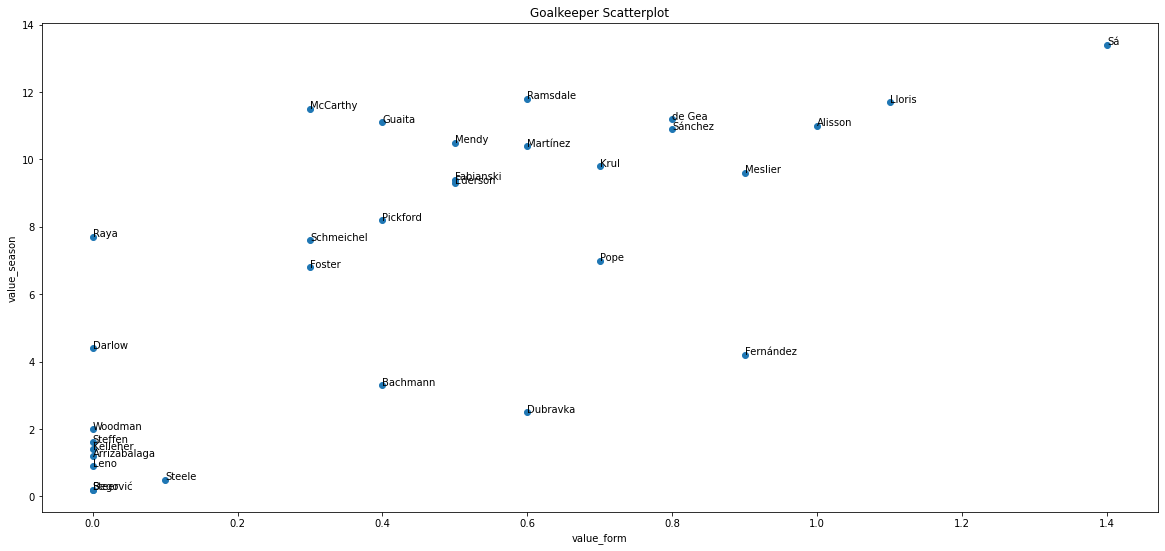

In [29]:
fig, ax = plt.subplots(figsize=(20,9))
ax.scatter(gk_df.value_form, gk_df.value_season)
ax.set_xlabel('value_form')
ax.set_ylabel('value_season')
ax.set_title('Goalkeeper Scatterplot')

for i, txt in enumerate(gk_df.web_name):
    ax.annotate(txt, (gk_df.value_form.iat[i], gk_df.value_season.iat[i]))
plt.show()

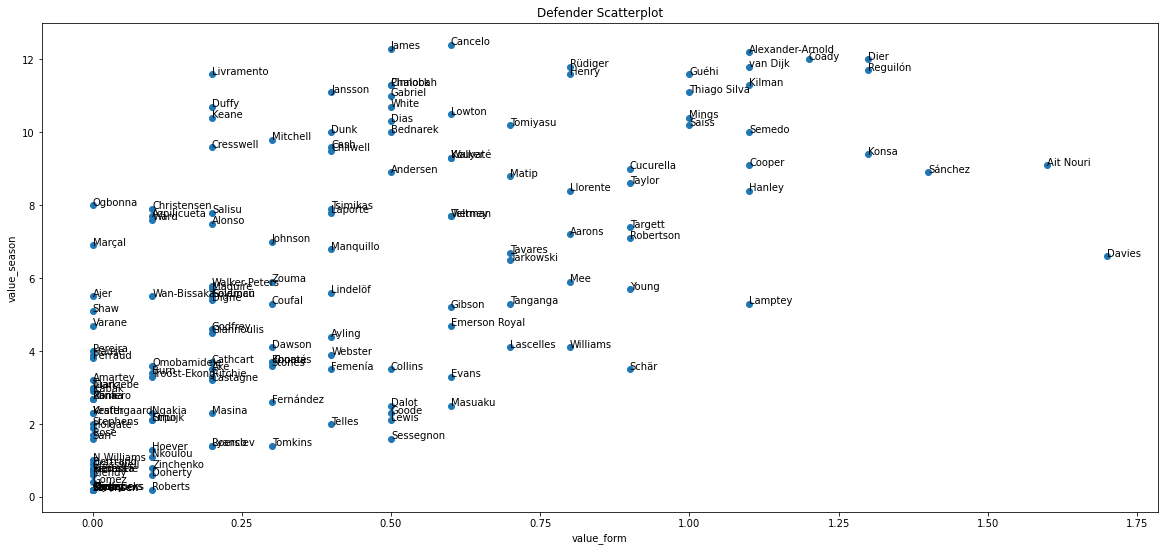

In [30]:
fig, ax = plt.subplots(figsize=(20,9))
ax.scatter(def_df.value_form, def_df.value_season)
ax.set_xlabel('value_form')
ax.set_ylabel('value_season')
ax.set_title('Defender Scatterplot')

for i, txt in enumerate(def_df.web_name):
    ax.annotate(txt, (def_df.value_form.iat[i], def_df.value_season.iat[i]))
plt.show()

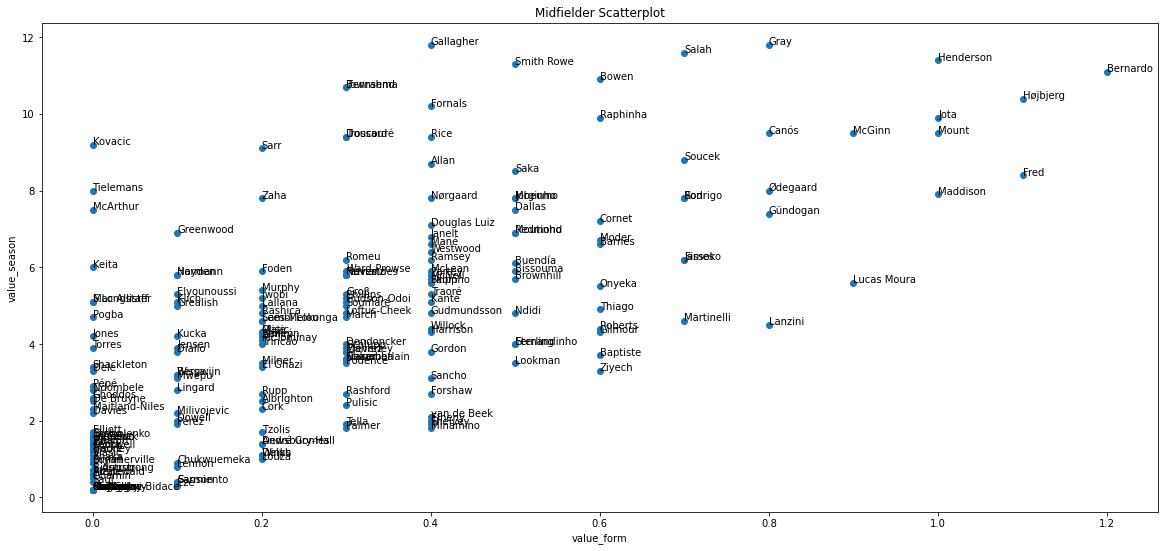

In [31]:
fig, ax = plt.subplots(figsize=(20,9))
ax.scatter(mid_df.value_form, mid_df.value_season)
ax.set_xlabel('value_form')
ax.set_ylabel('value_season')
ax.set_title('Midfielder Scatterplot')

for i, txt in enumerate(mid_df.web_name):
    ax.annotate(txt, (mid_df.value_form.iat[i], mid_df.value_season.iat[i]))
plt.show()

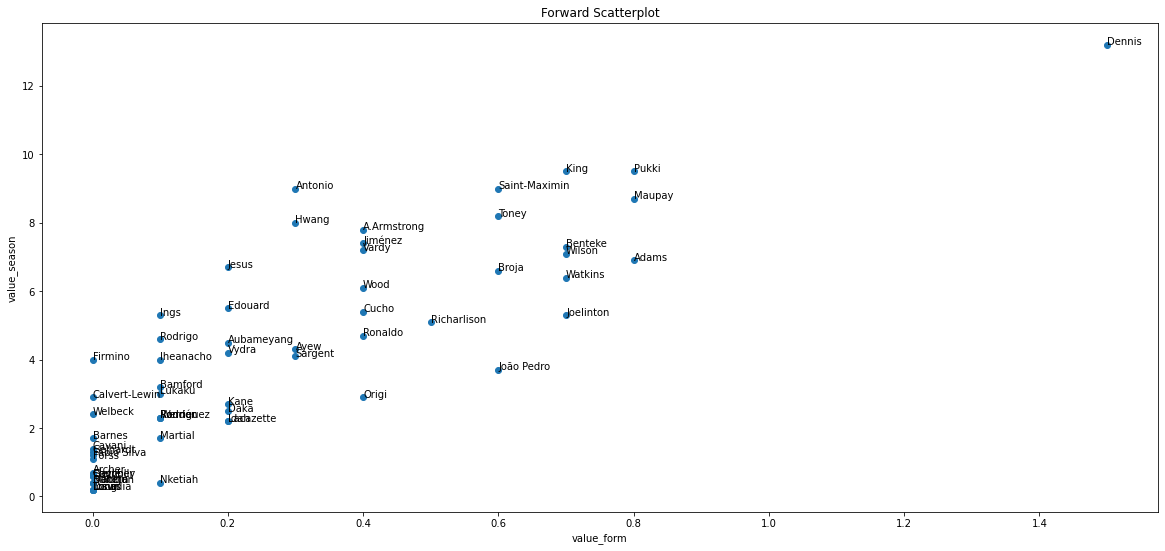

In [32]:
fig, ax = plt.subplots(figsize=(20,9))
ax.scatter(fwd_df.value_form, fwd_df.value_season)
ax.set_xlabel('value_form')
ax.set_ylabel('value_season')
ax.set_title('Forward Scatterplot')

for i, txt in enumerate(fwd_df.web_name):
    ax.annotate(txt, (fwd_df.value_form.iat[i], fwd_df.value_season.iat[i]))
plt.show()

## Team of Top Value Players

In [33]:
top2_gk_df = gk_df.nlargest(2, 'value_form_season')
top5_def_df = def_df.nlargest(5, 'value_form_season')
top5_mid_df = mid_df.nlargest(5, 'value_form_season')
top3_fwd_df = fwd_df.nlargest(3, 'value_form_season')

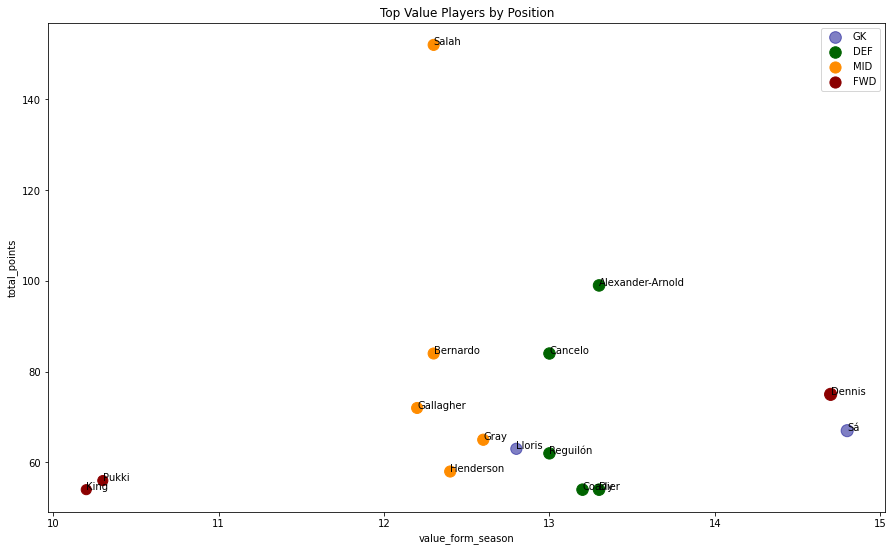

In [34]:
ax = top2_gk_df.plot.scatter(x='value_form_season', y='total_points', color='DarkBlue', label='GK', s=top2_gk_df['value_form_season']*10, alpha=.5, figsize=(15,9), title="Top Value Players by Position")
for i, txt in enumerate(top2_gk_df.web_name):
    ax.annotate(txt, (top2_gk_df.value_form_season.iat[i],top2_gk_df.total_points.iat[i]))
top5_def_df.plot.scatter(x='value_form_season', y='total_points', color='DarkGreen', label='DEF', s=top5_def_df['value_form_season']*10, ax=ax)
for i, txt in enumerate(top5_def_df.web_name):
    ax.annotate(txt, (top5_def_df.value_form_season.iat[i],top5_def_df.total_points.iat[i]))
top5_mid_df.plot.scatter(x='value_form_season', y='total_points', color='DarkOrange', label='MID', s=top5_mid_df['value_form_season']*10, ax=ax)
for i, txt in enumerate(top5_mid_df.web_name):
    ax.annotate(txt, (top5_mid_df.value_form_season.iat[i],top5_mid_df.total_points.iat[i]))
top3_fwd_df.plot.scatter(x='value_form_season', y='total_points', color='DarkRed', label='FWD', s=top3_fwd_df['value_form_season']*10, ax=ax)
for i, txt in enumerate(top3_fwd_df.web_name):
    ax.annotate(txt, (top3_fwd_df.value_form_season.iat[i],top3_fwd_df.total_points.iat[i]))

In [35]:
top2_gk_df

,web_name,position,club,selected_by_percent,now_cost,total_points,points_per_game,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value_form,value_season,value_form_season
555,Sá,Goalkeeper,Wolves,3.2,5.0,67,4.5,1350,0,1,5,13,0,0,0,1,0,46,7,303,364.0,30.0,0.0,39.2,1.4,13.4,14.8
453,Lloris,Goalkeeper,Spurs,8.8,5.4,63,4.5,1260,0,0,6,17,0,0,0,0,0,40,7,276,329.4,23.0,0.0,35.2,1.1,11.7,12.8


In [36]:
top5_def_df

,web_name,position,club,selected_by_percent,now_cost,total_points,points_per_game,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value_form,value_season,value_form_season
457,Dier,Defender,Spurs,6.4,4.5,54,3.9,1181,0,1,6,14,1,0,0,0,0,0,6,274,267.8,59.0,80.0,40.7,1.3,12.0,13.3
302,Alexander-Arnold,Defender,Liverpool,40.1,8.1,99,7.6,1143,1,7,8,10,0,0,0,1,0,0,18,411,414.2,649.0,214.0,127.9,1.1,12.2,13.3
536,Coady,Defender,Wolves,6.1,4.5,54,3.6,1346,1,0,5,13,0,0,0,1,0,0,2,272,276.2,7.4,67.0,35.1,1.2,12.0,13.2
325,Cancelo,Defender,Man City,39.0,6.8,84,5.6,1337,0,5,8,8,0,0,0,4,0,0,12,340,325.8,310.3,345.0,98.2,0.6,12.4,13.0
466,Reguilón,Defender,Spurs,17.7,5.3,62,4.8,1062,1,3,5,14,0,0,0,2,0,0,8,250,283.8,219.6,112.0,61.7,1.3,11.7,13.0


In [37]:
top5_mid_df

,web_name,position,club,selected_by_percent,now_cost,total_points,points_per_game,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value_form,value_season,value_form_season
215,Gray,Midfielder,Everton,9.6,5.5,65,4.3,1148,5,3,3,17,0,0,0,2,0,0,2,234,303.4,273.7,405.0,98.2,0.8,11.8,12.6
288,Henderson,Midfielder,Liverpool,2.6,5.1,58,4.1,1046,2,3,6,12,0,0,0,1,0,0,8,238,273.0,315.0,111.0,69.8,1.0,11.4,12.4
298,Salah,Midfielder,Liverpool,73.1,13.1,152,10.1,1350,13,10,9,12,0,0,0,1,0,0,19,454,715.0,444.1,1016.0,217.7,0.7,11.6,12.3
330,Bernardo,Midfielder,Man City,22.8,7.6,84,6.0,1208,7,2,7,8,0,0,0,3,0,0,12,345,413.8,336.6,435.0,118.8,1.2,11.1,12.3
167,Gallagher,Midfielder,Crystal Palace,24.8,6.1,72,5.1,1225,4,5,4,18,0,0,0,4,0,0,9,253,379.8,386.3,383.0,114.9,0.4,11.8,12.2


In [38]:
top3_fwd_df

,web_name,position,club,selected_by_percent,now_cost,total_points,points_per_game,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value_form,value_season,value_form_season
498,Dennis,Forward,Watford,24.4,5.7,75,5.4,1078,6,6,1,23,0,0,0,6,0,0,12,258,370.2,223.9,486.0,108.0,1.5,13.2,14.7
405,Pukki,Forward,Norwich,5.9,5.9,56,3.7,1279,5,0,3,29,0,0,0,2,0,0,8,180,200.4,116.6,467.0,78.6,0.8,9.5,10.3
500,King,Forward,Watford,6.1,5.7,54,4.2,996,5,3,0,18,0,0,0,3,0,0,5,190,266.8,228.7,440.0,93.7,0.7,9.5,10.2


In [39]:
# concat the dataframes for goalkeeper, defender, midfielder and forward
frames = [top2_gk_df, top5_def_df, top5_mid_df, top3_fwd_df]
best_team = pd.concat(frames)
best_team

,web_name,position,club,selected_by_percent,now_cost,total_points,points_per_game,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value_form,value_season,value_form_season
555,Sá,Goalkeeper,Wolves,3.2,5.0,67,4.5,1350,0,1,5,13,0,0,0,1,0,46,7,303,364.0,30.0,0.0,39.2,1.4,13.4,14.8
453,Lloris,Goalkeeper,Spurs,8.8,5.4,63,4.5,1260,0,0,6,17,0,0,0,0,0,40,7,276,329.4,23.0,0.0,35.2,1.1,11.7,12.8
457,Dier,Defender,Spurs,6.4,4.5,54,3.9,1181,0,1,6,14,1,0,0,0,0,0,6,274,267.8,59.0,80.0,40.7,1.3,12.0,13.3
302,Alexander-Arnold,Defender,Liverpool,40.1,8.1,99,7.6,1143,1,7,8,10,0,0,0,1,0,0,18,411,414.2,649.0,214.0,127.9,1.1,12.2,13.3
536,Coady,Defender,Wolves,6.1,4.5,54,3.6,1346,1,0,5,13,0,0,0,1,0,0,2,272,276.2,7.4,67.0,35.1,1.2,12.0,13.2
325,Cancelo,Defender,Man City,39.0,6.8,84,5.6,1337,0,5,8,8,0,0,0,4,0,0,12,340,325.8,310.3,345.0,98.2,0.6,12.4,13.0
466,Reguilón,Defender,Spurs,17.7,5.3,62,4.8,1062,1,3,5,14,0,0,0,2,0,0,8,250,283.8,219.6,112.0,61.7,1.3,11.7,13.0
215,Gray,Midfielder,Everton,9.6,5.5,65,4.3,1148,5,3,3,17,0,0,0,2,0,0,2,234,303.4,273.7,405.0,98.2,0.8,11.8,12.6
288,Henderson,Midfielder,Liverpool,2.6,5.1,58,4.1,1046,2,3,6,12,0,0,0,1,0,0,8,238,273.0,315.0,111.0,69.8,1.0,11.4,12.4
298,Salah,Midfielder,Liverpool,73.1,13.1,152,10.1,1350,13,10,9,12,0,0,0,1,0,0,19,454,715.0,444.1,1016.0,217.7,0.7,11.6,12.3


#### Remarks:
- This is the current best team based on _**['value_form_season']**_

## Player Transfer Watchlist

In [40]:
gk_df_watchlist = gk_df.nlargest(7, 'value_form_season')
def_df_watchlist = def_df.nlargest(20, 'value_form_season')
mid_df_watchlist = mid_df.nlargest(20, 'value_form_season')
fwd_df_watchlist = fwd_df.nlargest(13, 'value_form_season')

In [41]:
gk_df_watchlist

,web_name,position,club,selected_by_percent,now_cost,total_points,points_per_game,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value_form,value_season,value_form_season
555,Sá,Goalkeeper,Wolves,3.2,5.0,67,4.5,1350,0,1,5,13,0,0,0,1,0,46,7,303,364.0,30.0,0.0,39.2,1.4,13.4,14.8
453,Lloris,Goalkeeper,Spurs,8.8,5.4,63,4.5,1260,0,0,6,17,0,0,0,0,0,40,7,276,329.4,23.0,0.0,35.2,1.1,11.7,12.8
25,Ramsdale,Goalkeeper,Arsenal,14.5,5.0,59,4.9,1080,0,0,6,13,0,0,0,0,0,45,5,278,317.2,0.0,0.0,31.8,0.6,11.8,12.4
296,Alisson,Goalkeeper,Liverpool,7.8,6.0,66,4.7,1260,0,0,8,12,1,0,0,0,0,31,5,311,301.2,0.0,0.0,30.1,1.0,11.0,12.0
347,de Gea,Goalkeeper,Man Utd,6.6,5.0,56,3.7,1350,0,0,3,24,0,2,0,0,0,48,2,271,389.8,0.0,0.0,38.9,0.8,11.2,12.0
430,McCarthy,Goalkeeper,Southampton,4.5,4.6,53,3.5,1350,0,0,5,21,0,0,0,1,0,39,3,260,305.8,10.0,0.0,31.7,0.3,11.5,11.8
100,Sánchez,Goalkeeper,Brighton,19.2,4.6,50,3.6,1260,0,0,5,14,0,0,0,2,1,36,5,270,293.4,30.0,0.0,32.2,0.8,10.9,11.7


In [42]:
def_df_watchlist

,web_name,position,club,selected_by_percent,now_cost,total_points,points_per_game,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value_form,value_season,value_form_season
457,Dier,Defender,Spurs,6.4,4.5,54,3.9,1181,0,1,6,14,1,0,0,0,0,0,6,274,267.8,59.0,80.0,40.7,1.3,12.0,13.3
302,Alexander-Arnold,Defender,Liverpool,40.1,8.1,99,7.6,1143,1,7,8,10,0,0,0,1,0,0,18,411,414.2,649.0,214.0,127.9,1.1,12.2,13.3
536,Coady,Defender,Wolves,6.1,4.5,54,3.6,1346,1,0,5,13,0,0,0,1,0,0,2,272,276.2,7.4,67.0,35.1,1.2,12.0,13.2
325,Cancelo,Defender,Man City,39.0,6.8,84,5.6,1337,0,5,8,8,0,0,0,4,0,0,12,340,325.8,310.3,345.0,98.2,0.6,12.4,13.0
466,Reguilón,Defender,Spurs,17.7,5.3,62,4.8,1062,1,3,5,14,0,0,0,2,0,0,8,250,283.8,219.6,112.0,61.7,1.3,11.7,13.0
294,van Dijk,Defender,Liverpool,18.0,6.6,78,5.2,1350,1,1,9,12,0,0,0,1,0,0,8,368,329.0,85.8,174.0,58.8,1.1,11.8,12.9
160,James,Defender,Chelsea,35.0,6.2,76,6.9,729,4,4,4,6,0,0,0,3,1,0,13,257,302.4,290.6,223.0,81.6,0.5,12.3,12.8
148,Rüdiger,Defender,Chelsea,22.0,6.1,72,5.1,1260,2,1,7,9,0,0,0,2,0,0,4,293,264.6,157.4,211.0,63.3,0.8,11.8,12.6
188,Guéhi,Defender,Crystal Palace,1.5,4.5,52,3.5,1350,2,0,4,21,0,0,0,3,0,0,4,272,321.6,27.8,122.0,47.4,1.0,11.6,12.6
64,Henry,Defender,Brentford,1.9,4.5,52,3.5,1298,2,0,4,21,0,0,0,2,0,0,3,198,210.8,133.9,90.0,43.6,0.8,11.6,12.4


In [43]:
mid_df_watchlist

,web_name,position,club,selected_by_percent,now_cost,total_points,points_per_game,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value_form,value_season,value_form_season
215,Gray,Midfielder,Everton,9.6,5.5,65,4.3,1148,5,3,3,17,0,0,0,2,0,0,2,234,303.4,273.7,405.0,98.2,0.8,11.8,12.6
288,Henderson,Midfielder,Liverpool,2.6,5.1,58,4.1,1046,2,3,6,12,0,0,0,1,0,0,8,238,273.0,315.0,111.0,69.8,1.0,11.4,12.4
298,Salah,Midfielder,Liverpool,73.1,13.1,152,10.1,1350,13,10,9,12,0,0,0,1,0,0,19,454,715.0,444.1,1016.0,217.7,0.7,11.6,12.3
330,Bernardo,Midfielder,Man City,22.8,7.6,84,6.0,1208,7,2,7,8,0,0,0,3,0,0,12,345,413.8,336.6,435.0,118.8,1.2,11.1,12.3
167,Gallagher,Midfielder,Crystal Palace,24.8,6.1,72,5.1,1225,4,5,4,18,0,0,0,4,0,0,9,253,379.8,386.3,383.0,114.9,0.4,11.8,12.2
15,Smith Rowe,Midfielder,Arsenal,29.1,6.1,69,4.9,1138,5,2,5,20,0,0,0,0,0,0,6,246,317.2,271.1,284.0,87.1,0.5,11.3,11.8
461,Højbjerg,Midfielder,Spurs,4.7,5.0,52,3.7,1259,2,1,6,17,0,0,0,1,0,0,6,255,328.6,152.5,151.0,63.3,1.1,10.4,11.5
522,Bowen,Midfielder,West Ham,4.4,6.5,71,4.7,1228,3,7,3,18,0,0,0,1,0,0,4,207,308.2,295.1,542.0,114.5,0.6,10.9,11.5
214,Townsend,Midfielder,Everton,6.9,5.4,58,3.9,1175,3,2,3,22,0,0,0,3,0,0,8,216,321.0,437.3,176.0,93.3,0.3,10.7,11.0
521,Benrahma,Midfielder,West Ham,20.1,6.0,64,4.3,1119,3,3,4,14,0,0,0,0,0,0,8,240,263.8,252.3,326.0,84.4,0.3,10.7,11.0


In [44]:
fwd_df_watchlist

,web_name,position,club,selected_by_percent,now_cost,total_points,points_per_game,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value_form,value_season,value_form_season
498,Dennis,Forward,Watford,24.4,5.7,75,5.4,1078,6,6,1,23,0,0,0,6,0,0,12,258,370.2,223.9,486.0,108.0,1.5,13.2,14.7
405,Pukki,Forward,Norwich,5.9,5.9,56,3.7,1279,5,0,3,29,0,0,0,2,0,0,8,180,200.4,116.6,467.0,78.6,0.8,9.5,10.3
500,King,Forward,Watford,6.1,5.7,54,4.2,996,5,3,0,18,0,0,0,3,0,0,5,190,266.8,228.7,440.0,93.7,0.7,9.5,10.2
391,Saint-Maximin,Forward,Newcastle,16.8,6.8,61,4.1,1326,3,4,2,29,0,0,0,2,0,0,9,214,293.0,334.9,401.0,102.9,0.6,9.0,9.6
98,Maupay,Forward,Brighton,3.4,6.3,55,3.9,1014,6,0,4,13,0,0,0,4,0,0,11,177,229.8,147.5,329.0,70.0,0.8,8.7,9.5
515,Antonio,Forward,West Ham,39.1,7.9,71,5.1,1258,6,5,3,17,0,0,1,3,1,0,12,254,350.2,371.8,650.0,137.2,0.3,9.0,9.3
59,Toney,Forward,Brentford,20.0,6.7,55,3.9,1260,4,2,4,19,0,0,0,2,0,0,7,191,280.4,220.1,461.0,96.2,0.6,8.2,8.8
558,Hwang,Forward,Wolves,8.6,5.6,45,3.8,943,4,0,5,7,0,0,0,1,0,0,8,171,198.2,126.7,237.0,55.7,0.3,8.0,8.3
449,A.Armstrong,Forward,Southampton,3.7,5.9,46,3.3,1046,2,3,4,19,0,0,0,0,0,0,3,131,170.0,162.3,479.0,81.2,0.4,7.8,8.2
171,Benteke,Forward,Crystal Palace,3.0,6.4,47,3.1,944,4,1,4,14,0,0,0,3,0,0,6,155,233.4,159.0,405.0,79.1,0.7,7.3,8.0


Reference:
#### FPL Website
https://fantasy.premierleague.com/
#### David Allen
https://towardsdatascience.com/fantasy-premier-league-value-analysis-python-tutorial-using-the-fpl-api-8031edfe9910#99db
#### Charlie Byatt
https://towardsdatascience.com/python-for-fpl-data-analytics-dadb414ccefd